In [155]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math
from scipy.optimize import brenth


N = norm.cdf
# plt.rcParams['text.usetex'] = True

In [54]:
class GeometricBrownianMotion:

    W: np.ndarray
    time: np.ndarray

    def __init__(self, t: float, steps: int = 1000, paths: int = 1, beta:float=1, sigma:float=1, x_0:float=0, r:float=1, normalization:bool=True):
        Z = np.random.normal(0.0, 1.0, [paths, steps])
        X = np.zeros([paths, steps + 1])
        X[:,0] = x_0

        dt = t / steps
        for i in range(steps):
            if paths > 1 and normalization:
                Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
            X[:, i + 1] =  X[:, i] + (r * X[:, i]) * dt + sigma * X[:,i]  * np.power(dt, 0.5) * Z[:, i]


        self.X = X
        self.time = np.linspace(0, t, steps+1)
   

def BS_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)



r = 0.06
t = 1
x_0 = 10
k = 5
sigma = 3.0


steps = 1000 
paths = np.linspace(10, 1000, num=100, dtype=int)
normalized = []
unnormalized = []

Y_normalized = GeometricBrownianMotion(t=t, paths=paths.max(), steps=steps, beta=0.1, sigma=sigma, x_0=x_0, r=r, normalization=True)
Y_unnormalized = GeometricBrownianMotion(t=t, paths=paths.max(), steps=steps, beta=0.1, sigma=sigma, x_0=x_0, r=r, normalization=False)

for path in paths:
    for Y, vector in zip([Y_normalized, Y_unnormalized], [normalized, unnormalized]):
        X = Y.X[:path]
        mean =np.maximum(X[:,-1] - k, 0).mean()
        vector.append(mean)
    
    


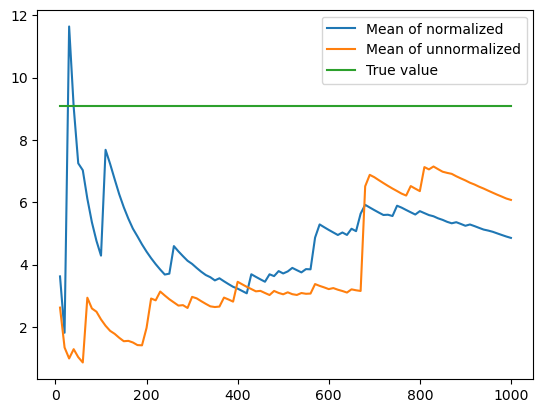

In [55]:
true_value = BS_call(x_0, k, t, r, sigma)


plt.figure()
plt.plot(paths, normalized, label="Mean of normalized")
plt.plot(paths, unnormalized, label="Mean of unnormalized")
plt.plot(paths, [true_value]*len(paths), label="True value")
plt.legend()


# Exercise 3

In [176]:
def f(x):
    return (math.e**x + math.e**(-x))/2 - 2*x

def df(x):
    return (math.e**x - math.e**(-x))/2 - 2


def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    values = [(x_0, f(x_0))]
    for _ in range(max_iter):
        x = x - f(x)/df(x)
        if abs(f(x)) < tol:
            break
        values.append((x, f(x)))
    return values



def combined(f, df, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    c =     (a+b)/2
    delta = -f(c)/df(c)
    values = [(c, f(c))]
    
    while delta/c > tol:
        c += delta
        
        if not a<=c<=b:
            if f(a)*f(c) < 0:
                b = c
            elif f(b)*f(c) < 0:
                a = c
            c = (a+b)/2
        
        delta = -f(c)/df(c)
        values.append((c, f(c)))
    return values

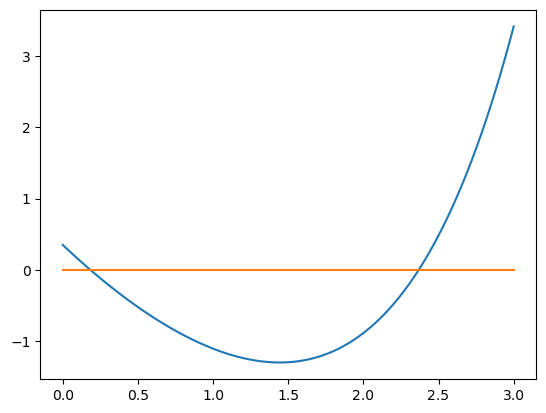

In [148]:
x = np.linspace(0, 3, 100)
y = f(x) 

plt.figure()
plt.plot(x, y, label="f(x)")
plt.plot(x,[0]*len(x), label="y=0")

In [166]:
from scipy import optimize

<Figure size 640x480 with 0 Axes>

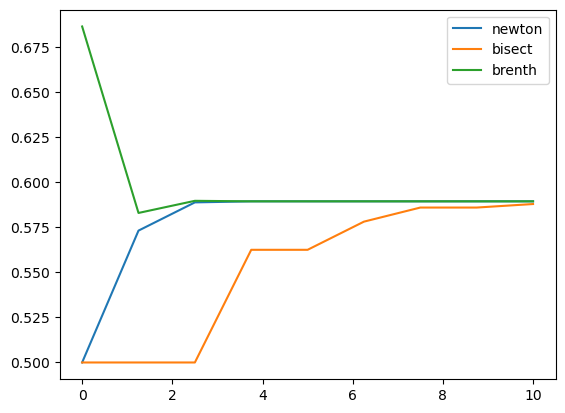

In [230]:
result = {
    'newton': ([], []),
    'bisect': ([], []),
    'brenth': ([], []),
}
plt.figure()
for i in range(1, 10):
    for optimizer_name, interval, additional_params in zip(result.keys(),[(0,), (0, 1), (0, 1)],[{'fprime': df}, None, None]):
        args = {'rtol':1e-6,'full_output':True, 'disp':False}
        args['maxiter'] = i
        if additional_params:
            args = {**args, **additional_params}
        optimizer = getattr(optimize, optimizer_name)
        x, _ = optimizer(f, *interval, **args)
        result[optimizer_name][0].append(x)
        result[optimizer_name][1].append(f(x))
        
        
x = np.linspace(0, 1, 100)
y = f(x) 

plt.figure()
for optimizer_name, values in result.items():
    plt.plot(np.linspace(0,10, num=len(values[0])), values[0], label=optimizer_name)
plt.legend()

<Figure size 640x480 with 0 Axes>

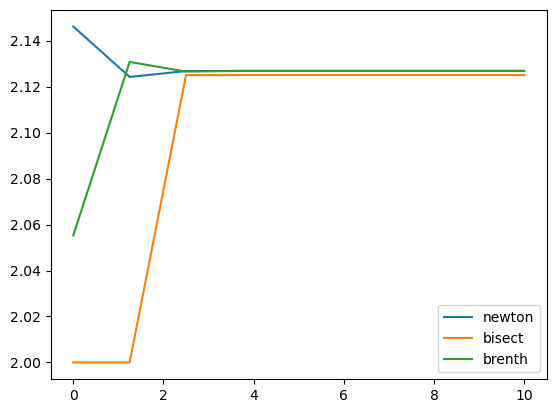

In [226]:
result = {
    'newton': ([], []),
    'bisect': ([], []),
    'brenth': ([], []),
}
plt.figure()
for i in range(1, 10):
    for optimizer_name, interval, additional_params in zip(result.keys(),[(0,), (0, 1), (0, 1)],[{'fprime': df}, None, None]):
        args = {'rtol':1e-6,'full_output':True, 'disp':False}
        args['maxiter'] = i
        if additional_params:
            args = {**args, **additional_params}
        optimizer = getattr(optimize, optimizer_name)
        x, _ = optimizer(f, *interval, **args)
        result[optimizer_name][0].append(x)
        result[optimizer_name][1].append(f(x))
        
        
x = np.linspace(0, 1, 100)
y = f(x) 

plt.figure()
for optimizer_name, values in result.items():
    plt.plot(np.linspace(0,10, num=len(values[0])), values[0], label=optimizer_name)
plt.legend()